In [1]:
# API jupyter notebook file

In [2]:
# Dependencies
# Dependencies
import requests
import json
import pandas as pd
from pprint import pprint
import numpy as np
import gmaps
import gmaps.datasets
import matplotlib.pyplot as plt
from config import (api_key)
import warnings
warnings.filterwarnings('ignore')
from scipy import stats as st

# Begin calls to API
#### gather all country data API has and store relevant data into empty lists
#### check that the lists are the same lenght- create DataFrame
#### team noticed that amount of countries gathered is greater than what is recognized in the globe- found that "Aggregate" countries were the extras. We then removed those from the DataFrame
#### save clean DataFrame as csv

In [3]:
# World bank base url
url = "http://api.worldbank.org/v2/country/?format=json"

# create empty list to hold all countries
all_countries = []
income_levels = []
country_codes = []
lats = []
lngs = []
regions = []

# loop through 6 pages of countries, adding countries to our empty list as we go
for x in range(6):
    countries_response = requests.get(f"{url}&page={x+1}").json() 
    #import pdb; pdb.set_trace()
    countries = countries_response[1]
    for country in countries:
        all_countries.append(country["name"])
        income_levels.append(country["incomeLevel"]['value'])
        country_codes.append(country['id'])
        lats.append(country['latitude'])
        lngs.append(country['longitude'])
        regions.append(country['region']['value'])

# print lengths of lists to check validity
print(f'Length of countries: {len(all_countries)}\nLength of income_levels: {len(income_levels)}\nLength of country_code: {len(country_codes)}')
print(f'Length of lats: {len(lats)}\nLength of lngs: {len(lngs)}\nLength of lats: {len(lats)}\nLength of lngs: {len(lngs)}')
print(f'Length of regions: {len(regions)}')
countries_df = pd.DataFrame({
    "Country" : all_countries,
    "Income Lvl" : income_levels,
    "Country Code" : country_codes,
    "Lat" : lats,
    "Lng" : lngs,
    "Region" : regions
})

clean_df = countries_df.loc[countries_df["Region"] != "Aggregates", :]

clean_df.to_csv("clean_countries.csv", index=False)

clean_df.head(5)

len(clean_df)

Length of countries: 297
Length of income_levels: 297
Length of country_code: 297
Length of lats: 297
Length of lngs: 297
Length of lats: 297
Length of lngs: 297
Length of regions: 297


218

### Test calling country-specific API queries

In [4]:
years = [2015, 2016,2017]

country_codes_test = clean_df['Country Code'][0:4]

for year in years:
    for code in country_codes_test:
        print(year,code)
        query_url = "http://api.worldbank.org/v2/country/" + code + "/indicator/NY.GDP.MKTP.CD?format=json&date=" + str(year)

2015 ABW
2015 AFG
2015 AGO
2015 ALB
2016 ABW
2016 AFG
2016 AGO
2016 ALB
2017 ABW
2017 AFG
2017 AGO
2017 ALB


# Functionalize GDP calls by country
#### function takes year as a parameter so we can gather multiple years

In [5]:
# Practice some calls using specific countries... total population


def yr_calls(year):
    """function changes year in request call
    Args:
        year(int):This is the year for api call 
    Returns:
        gpds(list): This returns yearly gpd for each country code
    """
#     final_countries = []
#     final_codes = []
    gdps = []

    for code in clean_df["Country Code"]:

        #Build Query Url
        try:
            query_url = "http://api.worldbank.org/v2/country/" + code + "/indicator/NY.GDP.MKTP.CD?format=json&date=" + str(year) 
            response = requests.get(query_url).json()
            #import pdb; pdb.set_trace()
            gdps.append(response[1][0]["value"])
#             final_countries.append(response[1][0]['country']['value'])
#             final_codes.append(response[1][0]['countryiso3code'])


        except:
            print(f"{code}'s GDP was not found")
            gdps.append("0")
#             final_countries.append("0")
#             final_codes.append("0")


 #   print(json.dumps(response, indent=4))
    
    return gdps

## Gather 2015 GDP data

In [6]:
# Using yr_calls function to return 2015 GDP as gdp_2015(list)

gdp_2015 = yr_calls(2015)

TWN's GDP was not found


### Add to DataFrame

In [7]:
#creating gdp dataframes
            
clean_df['2015 GDP'] = gdp_2015
clean_df.head()


,Country,Income Lvl,Country Code,Lat,Lng,Region,2015 GDP
0,Aruba,High income,ABW,12.5167,-70.0167,Latin America & Caribbean,2.91955e+09
1,Afghanistan,Low income,AFG,34.5228,69.1761,South Asia,1.99071e+10
3,Angola,Lower middle income,AGO,-8.81155,13.242,Sub-Saharan Africa,1.16194e+11
4,Albania,Upper middle income,ALB,41.3317,19.8172,Europe & Central Asia,1.13868e+10
5,Andorra,High income,AND,42.5075,1.5218,Europe & Central Asia,2.78987e+09


## Gather 2016 GDP data

In [8]:
# Using yr_calls function to return 2018 GDP as gdp_2018(list)
gdp_2016 = yr_calls(2016)

TWN's GDP was not found


### Add to DataFrame

In [9]:
# Adding gdp_YR(list) to clean_df 
clean_df['2016 GDP'] = gdp_2016
clean_df.head()

,Country,Income Lvl,Country Code,Lat,Lng,Region,2015 GDP,2016 GDP
0,Aruba,High income,ABW,12.5167,-70.0167,Latin America & Caribbean,2.91955e+09,2.96592e+09
1,Afghanistan,Low income,AFG,34.5228,69.1761,South Asia,1.99071e+10,1.80177e+10
3,Angola,Lower middle income,AGO,-8.81155,13.242,Sub-Saharan Africa,1.16194e+11,1.01124e+11
4,Albania,Upper middle income,ALB,41.3317,19.8172,Europe & Central Asia,1.13868e+10,1.18612e+10
5,Andorra,High income,AND,42.5075,1.5218,Europe & Central Asia,2.78987e+09,2.89668e+09


## Gather 2017 GDP data

In [10]:
# Using yr_calls function to return 2017 GDP as gdp_2017(list)
gdp_2017 = yr_calls(2017)

TWN's GDP was not found


### Add to DataFrame

In [11]:
# Adding gdp_YR(list) to clean_df 
clean_df['2017 GDP'] = gdp_2017
clean_df.head()

,Country,Income Lvl,Country Code,Lat,Lng,Region,2015 GDP,2016 GDP,2017 GDP
0,Aruba,High income,ABW,12.5167,-70.0167,Latin America & Caribbean,2.91955e+09,2.96592e+09,3.05642e+09
1,Afghanistan,Low income,AFG,34.5228,69.1761,South Asia,1.99071e+10,1.80177e+10,1.88699e+10
3,Angola,Lower middle income,AGO,-8.81155,13.242,Sub-Saharan Africa,1.16194e+11,1.01124e+11,1.22124e+11
4,Albania,Upper middle income,ALB,41.3317,19.8172,Europe & Central Asia,1.13868e+10,1.18612e+10,1.30197e+10
5,Andorra,High income,AND,42.5075,1.5218,Europe & Central Asia,2.78987e+09,2.89668e+09,3.00018e+09


## Gather 2018 GDP data

In [12]:
# Using yr_calls function to return 2018 GDP as gdp_2018(list)
gdp_2018 = yr_calls(2018)

TWN's GDP was not found


### Add to DataFrame

In [13]:
# Adding gdp_YR(list) to clean_df 
clean_df['2018 GDP'] = gdp_2018
clean_df.head()

,Country,Income Lvl,Country Code,Lat,Lng,Region,2015 GDP,2016 GDP,2017 GDP,2018 GDP
0,Aruba,High income,ABW,12.5167,-70.0167,Latin America & Caribbean,2.91955e+09,2.96592e+09,3.05642e+09,None
1,Afghanistan,Low income,AFG,34.5228,69.1761,South Asia,1.99071e+10,1.80177e+10,1.88699e+10,1.83539e+10
3,Angola,Lower middle income,AGO,-8.81155,13.242,Sub-Saharan Africa,1.16194e+11,1.01124e+11,1.22124e+11,1.01353e+11
4,Albania,Upper middle income,ALB,41.3317,19.8172,Europe & Central Asia,1.13868e+10,1.18612e+10,1.30197e+10,1.5147e+10
5,Andorra,High income,AND,42.5075,1.5218,Europe & Central Asia,2.78987e+09,2.89668e+09,3.00018e+09,3.21832e+09


## Gather 2019 GDP data

In [14]:
# Using yr_calls function to return 2019 GDP as gdp_2019(list)
gdp_2019 = yr_calls(2019)

TWN's GDP was not found


### Add to DataFrame

In [15]:
# Adding gdp_YR(list) to clean_df 
clean_df['2019 GDP'] = gdp_2019
clean_df = clean_df.fillna(0)
clean_df.head()

,Country,Income Lvl,Country Code,Lat,Lng,Region,2015 GDP,2016 GDP,2017 GDP,2018 GDP,2019 GDP
0,Aruba,High income,ABW,12.5167,-70.0167,Latin America & Caribbean,2.91955e+09,2.96592e+09,3.05642e+09,0,0
1,Afghanistan,Low income,AFG,34.5228,69.1761,South Asia,1.99071e+10,1.80177e+10,1.88699e+10,1.83539e+10,1.92911e+10
3,Angola,Lower middle income,AGO,-8.81155,13.242,Sub-Saharan Africa,1.16194e+11,1.01124e+11,1.22124e+11,1.01353e+11,8.88157e+10
4,Albania,Upper middle income,ALB,41.3317,19.8172,Europe & Central Asia,1.13868e+10,1.18612e+10,1.30197e+10,1.5147e+10,1.52792e+10
5,Andorra,High income,AND,42.5075,1.5218,Europe & Central Asia,2.78987e+09,2.89668e+09,3.00018e+09,3.21832e+09,3.15406e+09


# Adam's Section

In [16]:
#find the counts of region
region_total = clean_df.groupby(['Region'])
region_total.count()

,Country,Income Lvl,Country Code,Lat,Lng,2015 GDP,2016 GDP,2017 GDP,2018 GDP,2019 GDP
Region,,,,,,,,,,
East Asia & Pacific,38,38,38,38,38,38,38,38,38,38
Europe & Central Asia,58,58,58,58,58,58,58,58,58,58
Latin America & Caribbean,42,42,42,42,42,42,42,42,42,42
Middle East & North Africa,21,21,21,21,21,21,21,21,21,21
North America,3,3,3,3,3,3,3,3,3,3
South Asia,8,8,8,8,8,8,8,8,8,8
Sub-Saharan Africa,48,48,48,48,48,48,48,48,48,48


In [17]:
income_level = clean_df.groupby(['Income Lvl'])
income_level.count()

,Country,Country Code,Lat,Lng,Region,2015 GDP,2016 GDP,2017 GDP,2018 GDP,2019 GDP
Income Lvl,,,,,,,,,,
High income,83,83,83,83,83,83,83,83,83,83
Low income,29,29,29,29,29,29,29,29,29,29
Lower middle income,50,50,50,50,50,50,50,50,50,50
Upper middle income,56,56,56,56,56,56,56,56,56,56


In [18]:
total_region = clean_df['Region'].value_counts()
total_region.head()

Europe & Central Asia         58
Sub-Saharan Africa            48
Latin America & Caribbean     42
East Asia & Pacific           38
Middle East & North Africa    21
Name: Region, dtype: int64

In [19]:
region_total['2019 GDP'].describe()

,count,unique,top,freq
Region,,,,
East Asia & Pacific,38.0,31.0,0.000000e+00,8.0
Europe & Central Asia,58.0,50.0,0.000000e+00,9.0
Latin America & Caribbean,42.0,35.0,0.000000e+00,8.0
Middle East & North Africa,21.0,19.0,0.000000e+00,3.0
North America,3.0,3.0,1.736426e+12,1.0
South Asia,8.0,8.0,8.400878e+10,1.0
Sub-Saharan Africa,48.0,47.0,0.000000e+00,2.0


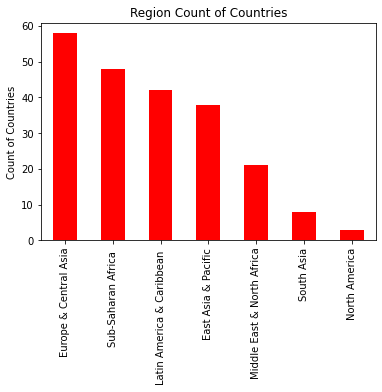

In [20]:
# Configure plot and ticks
total_region.plot(kind='bar', facecolor='r')
plt.ylabel('Count of Countries')
plt.title("Region Count of Countries")
plt.show()

In [21]:
income_lvl = clean_df['Income Lvl'].value_counts()

Text(0.5, 1.0, 'Percent of Income Countries - World Bank')

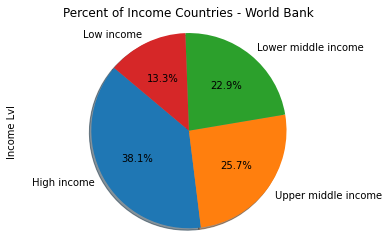

In [22]:
# configure
income_lvl.plot(kind='pie', shadow=True, autopct='%1.1f%%', startangle=140 )
plt.axis("equal")
plt.title("Percent of Income Countries - World Bank")

# Adam's Comments

Data Discovery Journey

As a group we decided to look at the World Bank API to analyze if Population Size and Income Level were closely correlated.  While doing this analysis, we realized that the World Bank API didn't have Population, meaning that we had to identify another source for that infomration.  While looking at the World Bank API, we also realized that the information was rolling up in an interesting way.  We had almost 300 entries for each year, but realized there were a little more than 200 countires in the world.  We realized that a lot of sub regions were rolling up into the data (groups of countries close in geography) as entires into the data.  The group noticed that these groups were labeled "Aggragets" in the data so we wrote code to take those rolled up entries out of the data.  

This lead to another discovery.  We found that some recognized countires show up in the data but didn't have World Bank information.  An example of this is Taiwan.  Taiwan shows up in the line item data, but didn't have a GDP.  Upon additional research, the team realized that Taiwan is rolled into China's number (perhaps due to geo political reasons).  The team also noticed that North Korea didn't show up in the data (perhaps the World Bank doesn't recognize them in this way). 

This lead to another discovery.  Not every country was in every year of the data.  We noticed that many of these countries were small and perhaps had some political/transition complication that didn't allow for the World Bank to gather information on or recognize them as a country that year.

Lastly, we noticed that not every country had GDP information for every year.  Aruba being one country when looking at the head() of the data that jumped off the page.  They had GDP inforamtion for 2015, 2016 & 2017 all of which were increasing.  But noticed that they didn't have GDP reported on 2018 and 2019.  


# Cheyenne Section

In [23]:
gkey = api_key # define gkey as API key
gmaps.configure(api_key=gkey) # configure API key

In [24]:
clean_df = clean_df.replace("", np.nan) # clean out any null data and replace with 0
clean_df = clean_df.dropna() # drop any NA data

clean_df_lat = clean_df["Lat"]
clean_df_lng = clean_df["Lng"]

lats = [float(lat) for lat in clean_df_lat] # set strings to float
lngs = [float(lng) for lng in clean_df_lng] # set strings to float

# Store 'Lat' and 'Lng' into locations
locations = clean_df[["Lat","Lng"]].astype(float) # set locations to float with astype function

# Convert income level to float and store

gdp_2019 = clean_df["2019 GDP"].astype(float)

In [25]:
max_2019 = clean_df["2019 GDP"].max() # find the max income
#max_2019
max_country_2019 = clean_df.loc[clean_df["2019 GDP"] == max_2019, :]
max_country_2019

,Country,Income Lvl,Country Code,Lat,Lng,Region,2015 GDP,2016 GDP,2017 GDP,2018 GDP,2019 GDP
281,United States,High income,USA,38.8895,-77.032,North America,18224704440000,18714960538000,19519353692000,20580159776000,21433226000000


In [26]:
min_2019 = clean_df["2019 GDP"].min() # find the min income
# min_2019
min_country_2019 = clean_df.loc[clean_df["2019 GDP"] == min_2019, :]
min_country_2019.head()

,Country,Income Lvl,Country Code,Lat,Lng,Region,2015 GDP,2016 GDP,2017 GDP,2018 GDP,2019 GDP
0,Aruba,High income,ABW,12.5167,-70.0167,Latin America & Caribbean,2.91955e+09,2.96592e+09,3.05642e+09,0,0
10,American Samoa,Upper middle income,ASM,-14.2846,-170.691,East Asia & Pacific,661000000,652000000,602000000,636000000,0
61,Cuba,Upper middle income,CUB,23.1333,-82.3667,Latin America & Caribbean,87133000000,91370000000,96851000000,100023000000,0
63,Cayman Islands,High income,CYM,19.3022,-81.3857,Latin America & Caribbean,4.70834e+09,4.9095e+09,5.15309e+09,5.51736e+09,0
90,Eritrea,Low income,ERI,15.3315,38.9183,Sub-Saharan Africa,0,0,0,0,0


### HEATMAP BLOCK NOT FUNCTIONING PROPERLY

In [50]:
fig = gmaps.figure()
heatmap_data = {"Counts": gdp_2019,
               "latitude": lats,
               "longitude": lngs,
               }

weights = heatmap_data["Counts"]
heatmap_layer = gmaps.heatmap_layer(locations)

marker_locations = [
    (38.8895, -77.032), # United States
    (12.5167, -170.691), # Aruba
    (-14.2846, -170.691), # American Samoa
    (23.1333, -82.3667), # Cuba
    (19.3022, -81.3857) # Cayman Islands
]

markers = gmaps.marker_layer(marker_locations)

gdp_level = [
    {'name': 'United States', 'location': (38.8895, -77.032), 'Income_Lvl': 2.143323e+13},
    {'name': 'Aruba', 'location': (12.5167, -170.691), 'Income_Lvl': 0},
    {'name': 'American Samoa', 'location': (-14.2846, -170.691), 'Income_Lvl': 0},
    {'name': 'Cuba', 'location': (23.1333, -82.3667), 'Income_Lvl': 0},
    {'name': 'Cayman Islands', 'location': (19.3022, -81.3857), 'Income_Lvl': 0},
]

income_locations = [income['location'] for income in income_level]
info_box_template = """
<dl>
<dt>Name</dt><dd>{name}</dd>
<dt>2019 GDP Amount</dt><dd>{Income_Lvl}</dd>
</dl>
"""
income_info = [info_box_template.format(**income) for income in income_level]

marker_layer = gmaps.marker_layer(income_locations, info_box_content=income_info)
fig.add_layer(marker_layer)
fig.add_layer(markers)
fig.add_layer(heatmap_layer)
fig

TypeError: tuple indices must be integers or slices, not str

# Nathan Section

## In this section we compared the World Banks Income Levels and GDP for 2015, 2016, 2017, 2018 and 2019. 2020 GDP data was not available in the World Bank API.  

#### Below we plotted histograms to visually see the distrubution of GDP. The histrogram visually shows that the data must have some significant outliers in the data set due to the poor distubution plotted. This visual check confrimed that some more data mining is required before we make assumptions or plot the data using statistical tools like the mean. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B4AC2CC7F0>,
      dtype=object)

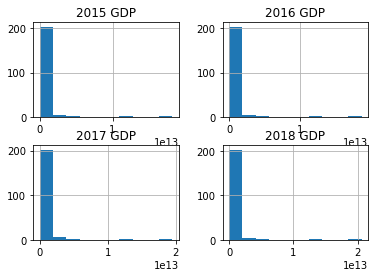

In [27]:
# Creating Histograms for a quick visual check of that data spread

import numpy as np
import matplotlib.pyplot as plt

for each_col in ['2015 GDP', '2016 GDP', '2017 GDP', '2018 GDP', '2019 GDP']: 
    clean_df[each_col]=pd.to_numeric(clean_df[each_col], errors='coerce')
# clean_df.head()
# low_income=clean_df[clean_df['Income Lvl'] == 'Low income']
clean_df[['2015 GDP', '2016 GDP', '2017 GDP', '2018 GDP']].hist()

#### From the histograms above we knew that the World Bank income grouping would have outliers and other statistical issues for meaningful plotting. This also helps us conclude that a countries GDP may not correlate to the income of individuals.

#### Looking at the box plots below we can confirm that the World Bank income levels have a significant number of outliers and narrow IQR per group. Since each value in the data set is a true value representing a country’s GDP we are not able to throw out outliers from the dataset and still have an accurate represented data set of the world. Instead of throwing out outliers it would be better to regroup or re-bin the income levels into additional groups to compress the spread of GDP.  


In [28]:
clean_df.head()

,Country,Income Lvl,Country Code,Lat,Lng,Region,2015 GDP,2016 GDP,2017 GDP,2018 GDP,2019 GDP
0,Aruba,High income,ABW,12.5167,-70.0167,Latin America & Caribbean,2.919553e+09,2.965922e+09,3.056425e+09,0.000000e+00,0.000000e+00
1,Afghanistan,Low income,AFG,34.5228,69.1761,South Asia,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10
3,Angola,Lower middle income,AGO,-8.81155,13.242,Sub-Saharan Africa,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.881570e+10
4,Albania,Upper middle income,ALB,41.3317,19.8172,Europe & Central Asia,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.527918e+10
5,Andorra,High income,AND,42.5075,1.5218,Europe & Central Asia,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.154058e+09


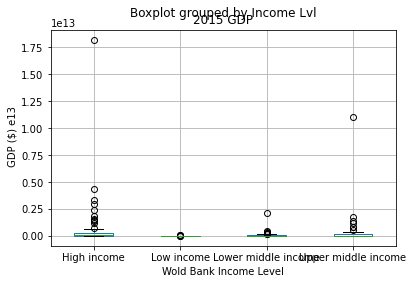

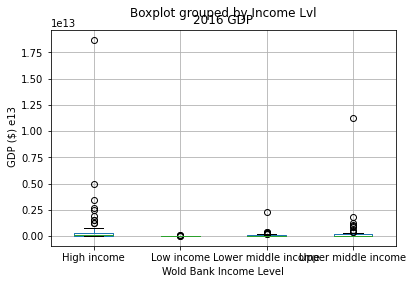

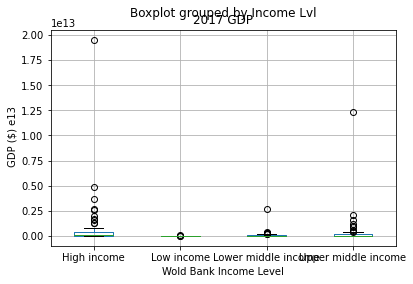

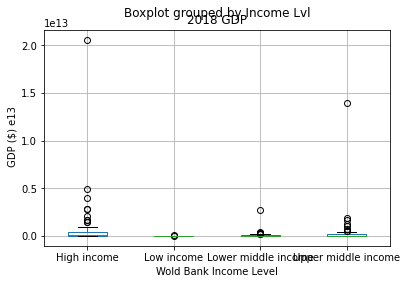

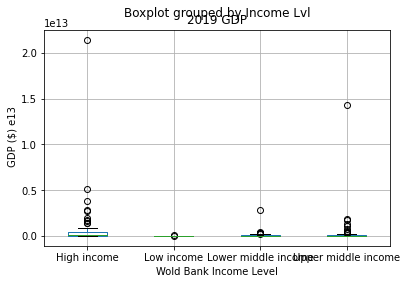

In [29]:
# Plotting box plots to visually see outliers, the IQR and median. 

for each_col in ['2015 GDP', '2016 GDP', '2017 GDP', '2018 GDP', '2019 GDP']: 
    clean_df[['Income Lvl', each_col]].boxplot(by='Income Lvl')
    

    plt.xlabel("Wold Bank Income Level")
    plt.ylabel(" GDP ($) e13")

###  Below is our work to experiment with re-grouping the 2015 GDP to attempt to create more meaningful income groups. 

### We first decided to make a new bin based on the combined countries GDP from 2015 to 2019. We then combined the countries GDP Bin to their Income Level grouping. 

### Findings: A county's GDP does not equate to the country's income level. You will see that there are country's with high GDP but low income which would mean that there is a wealth disparity between money coming into a country and going back to their people. We also see that there are a great number of low GDP country's with high income. These are probably countries with smaller populations. 

### Next Steps: It would be better to now re-bin the county GDP based on GDP per capita in order to get a more accurate picture of l

In [30]:
average_per_country=clean_df[['2015 GDP', '2016 GDP', '2017 GDP', '2018 GDP', '2019 GDP']].mean(axis=1)#.plot(kind='box', showfliers=False)
bin_labels={'Low GDP': average_per_country.describe()['25%'], 
            'Lower GDP': average_per_country.describe()['50%'], 
            'Upper GDP': average_per_country.describe()['75%'], 
            'High GDP': average_per_country.max()}
bins=[0]+list(bin_labels.values())
new_df=pd.DataFrame()
new_df['average_gdp']=average_per_country
new_df['bins']=pd.cut(average_per_country, bins=bins, labels=bin_labels.keys())
new_df['old_bins']=clean_df['Income Lvl']
display(new_df.head())
# new_df.boxplot(by='bins')
# new_df['agree']=new_df['old_bins']==new_df['bins']
new_df.groupby('old_bins')['bins'].value_counts()

,average_gdp,bins,old_bins
0,1.788380e+09,Low GDP,High income
1,1.888796e+10,Lower GDP,Low income
3,1.059221e+11,Upper GDP,Lower middle income
4,1.333879e+10,Lower GDP,Upper middle income
5,3.011821e+09,Low GDP,High income


old_bins             bins     
High income          High GDP     31
                     Upper GDP    17
                     Low GDP      15
                     Lower GDP    11
Low income           Lower GDP    13
                     Low GDP       8
                     Upper GDP     5
Lower middle income  Upper GDP    16
                     Lower GDP    14
                     Low GDP      12
                     High GDP      7
Upper middle income  High GDP     15
                     Lower GDP    15
                     Upper GDP    14
                     Low GDP      11
Name: bins, dtype: int64

In [31]:
#Determining basic statical details of the 2015 GDP data.

min_value = clean_df['2015 GDP'].min()
max_value = clean_df['2015 GDP'].max()
print(min_value)
print(max_value)

clean_df['2015 GDP'].describe()

0.0
18224704440000.0


count    2.110000e+02
mean     3.511570e+11
std      1.546667e+12
min      0.000000e+00
25%      4.481194e+09
50%      2.141084e+10
75%      1.719145e+11
max      1.822470e+13
Name: 2015 GDP, dtype: float64

In [32]:
#Attempting to re-bin the 2015 GDP into new catogories with less outliers utilizing the basic statiscal details. 

bins = (0, 4.074357e+09, 1.993512e+10, 1.525735e+11, 1.525735e+12, 1.822470e+13)
bins

labels = labels = ['Lowest Low', 'Middle', 'Upper Middle', 'High', 'Exterme High']

clean_df['2015 bins'] = pd.cut(clean_df['2015 GDP'], bins=bins, labels=labels, include_lowest=True)

clean_df.head()

,Country,Income Lvl,Country Code,Lat,Lng,Region,2015 GDP,2016 GDP,2017 GDP,2018 GDP,2019 GDP,2015 bins
0,Aruba,High income,ABW,12.5167,-70.0167,Latin America & Caribbean,2.919553e+09,2.965922e+09,3.056425e+09,0.000000e+00,0.000000e+00,Lowest Low
1,Afghanistan,Low income,AFG,34.5228,69.1761,South Asia,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,Middle
3,Angola,Lower middle income,AGO,-8.81155,13.242,Sub-Saharan Africa,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.881570e+10,Upper Middle
4,Albania,Upper middle income,ALB,41.3317,19.8172,Europe & Central Asia,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.527918e+10,Middle
5,Andorra,High income,AND,42.5075,1.5218,Europe & Central Asia,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.154058e+09,Lowest Low


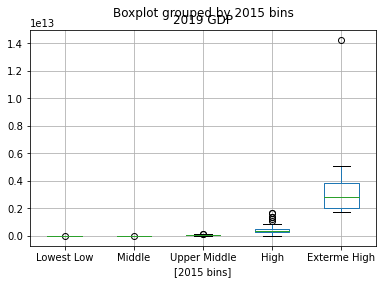

In [33]:
# Plotting box plot to visually see if the new bins fit the data better

clean_df[['2015 bins', each_col]].boxplot(by='2015 bins')

### Below are scatter plots to explore the change in GDP per the World Bank's income levels. 

#### The scatter plots show that the rate of change between all the countries within the World Bank's income level 

### 2018 - 2019 GDP Rate of Change 
#### The scatter plots below show that all the countries within each of the World Bank's income level had about the same rate of change in GDP throughout 2018 and 2019. This is shown by the linear relationship seen when plotting previous years GDP and the 2019 GDP data. 

Text(0, 0.5, '2019 GDP ($) e13')

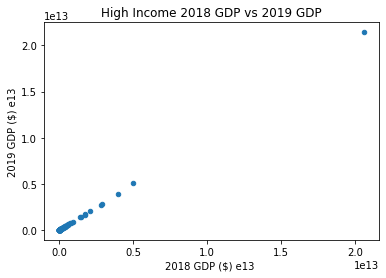

In [34]:
clean_df[clean_df['Income Lvl']=='High income'][['2018 GDP', '2019 GDP']].plot(kind='scatter', x='2018 GDP', y='2019 GDP')

plt.title("High Income 2018 GDP vs 2019 GDP")
plt.xlabel("2018 GDP ($) e13 ")
plt.ylabel("2019 GDP ($) e13")

Text(0, 0.5, '2019 GDP ($) e10')

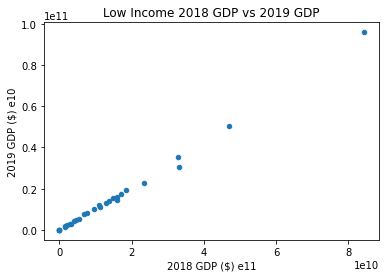

In [35]:
clean_df[clean_df['Income Lvl']=='Low income'][['2018 GDP', '2019 GDP']].plot(kind='scatter', x='2018 GDP', y='2019 GDP')
plt.title("Low Income 2018 GDP vs 2019 GDP")
plt.xlabel("2018 GDP ($) e11")
plt.ylabel("2019 GDP ($) e10")

### 2015 - 2019 GDP Rate of Change 

#### Below you can see that the rate of change for high income and low income has some difference. The countries within the high-income group all had about the same rate of change from 2015 to 2019 which can be seen by the relatively linear relationship. However, the low-income grouping had some variety in the GDP rate of change which can be seen with some countries plot not following the 1:1 linear relationship.


Text(0, 0.5, '2019 GDP ($) e13')

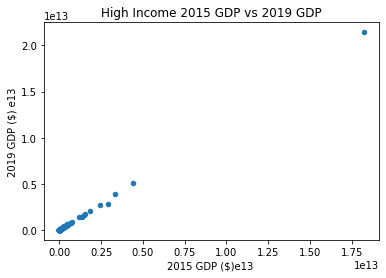

In [36]:
clean_df[clean_df['Income Lvl']=='High income'][['2015 GDP', '2019 GDP']].plot(kind='scatter', x='2015 GDP', y='2019 GDP')
plt.title("High Income 2015 GDP vs 2019 GDP")
plt.xlabel("2015 GDP ($)e13 ")
plt.ylabel("2019 GDP ($) e13")

Text(0, 0.5, '2019 GDP ($) e10')

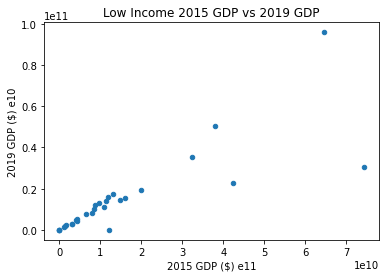

In [37]:
clean_df[clean_df['Income Lvl']=='Low income'][['2015 GDP', '2019 GDP']].plot(kind='scatter', x='2015 GDP', y='2019 GDP')
plt.title("Low Income 2015 GDP vs 2019 GDP")
plt.xlabel("2015 GDP ($) e11")
plt.ylabel("2019 GDP ($) e10")

# Jonathan Section

### Use an API request to get all the possible indicators- searching for interesting topics.
##### this is how i attempted to find the Population indicator necessary for the API response call. Unfortunately (and oddly), it didn't exist in this list. Fortunately, I found it in the documentation, and used this list to find another topic of interest- Access to Electricity %

In [38]:
# test commit
j_url = "http://api.worldbank.org/v2/indicator?format=json"
indicator_response = requests.get(j_url).json()
indicator_names = []
for x in range(50):
    indicator_names.append(indicator_response[1][x]['name'])
indicator_names

['Poverty Headcount ($1.90 a day)',
 'Poverty Headcount ($2.50 a day)',
 'Middle Class ($10-50 a day) Headcount',
 'Official Moderate Poverty Rate-National',
 'Poverty Headcount ($4 a day)',
 'Vulnerable ($4-10 a day) Headcount',
 'Poverty Gap ($1.90 a day)',
 'Poverty Gap ($2.50 a day)',
 'Poverty Gap ($4 a day)',
 'Poverty Severity ($1.90 a day)',
 'Poverty Severity ($2.50 a day)',
 'Poverty Severity ($4 a day)',
 'Poverty Headcount ($1.90 a day)-Rural',
 'Poverty Headcount ($2.50 a day)-Rural',
 'Middle Class ($10-50 a day) Headcount-Rural',
 'Official Moderate Poverty Rate- Rural',
 'Poverty Headcount ($4 a day)-Rural',
 'Vulnerable ($4-10 a day) Headcount-Rural',
 'Poverty Gap ($1.90 a day)-Rural',
 'Poverty Gap ($2.50 a day)-Rural',
 'Poverty Gap ($4 a day)-Rural',
 'Poverty Severity ($1.90 a day)-Rural',
 'Poverty Severity ($2.50 a day)-Rural',
 'Poverty Severity ($4 a day)-Rural',
 'Access to electricity (% of total population)',
 'Total final energy consumption (TFEC)',
 'Lite

# Search API using indicator code for Population, grab 2019 data 
 ####   - located at response[1][1]['value']

In [39]:
# define empty lists to append data to
populations = []
    
# run for loop, looping throug hall the country (codes) in our Countries DataFrame (named clean_df)
for code in clean_df["Country Code"]:

    #Build Query Url
    try:
        population_url = "http://api.worldbank.org/v2/country/" + code + "/indicator/SP.POP.TOTL?format=json" 
        pop_response = requests.get(population_url).json()
          #import pdb; pdb.set_trace()
            
          # append population values to list
        populations.append(int(pop_response[1][1]['value']))

    except (KeyError, TypeError):
        print(f"{code}'s Population Data was not found")
        populations.append(0)
        

ERI's Population Data was not found


### Create new data frame to add 2019 populations to

In [40]:
# create new DataFrame to add populations
population_df = clean_df.copy()

# add population data to DataFrame
population_df["2019 Population"] = populations

population_df.head()
population_df["2019 Population"].max()


1397715000

# Search API using indicator code for Electricity Access data, grab latest data
   #### - located at response[1][0]['value']
   #### - latests data is 2016

In [41]:
# GET ELECTRCIITY ACCESS DATA FROM 2016
# define empty list to append data to 
elec_access = []

# run for loop, looping throug hall the country (codes) in our Countries DataFrame (named clean_df)
for code in clean_df["Country Code"]:

    #Build Query Url
    try:
        elec_url = "http://api.worldbank.org/v2/country/" + code + "/indicator/1.1_ACCESS.ELECTRICITY.TOT?format=json" 
        elec_response = requests.get(elec_url).json()
          #import pdb; pdb.set_trace()
            
          # append population values to list
        elec_access.append(int(elec_response[1][0]['value']))

    except (KeyError, TypeError):
        print(f"{code}'s Electricity-Access Data was not found")
        elec_access.append(0)
        


ASM's Electricity-Access Data was not found
VGB's Electricity-Access Data was not found


# Grabbing 2016 Population Data to match 2016 Electricity Access Data

In [42]:
# GET POPULATION DATA FROM 2016 (to match electricity access data year)
# define empty lists to append data to
populations_2016 = []
    
# run for loop, looping throug hall the country (codes) in our Countries DataFrame (named clean_df)
for code in clean_df["Country Code"]:

    #Build Query Url
    try:
        population_url = "http://api.worldbank.org/v2/country/" + code + "/indicator/SP.POP.TOTL?format=json" 
        pop_response = requests.get(population_url).json()
          #import pdb; pdb.set_trace()
            
          # append population values to list
        populations_2016.append(int(pop_response[1][4]['value']))

    except (KeyError, TypeError):
        print(f"{code}'s 2016 Population Data was not found")
        populations_2016.append(0)

len(populations_2016)

ERI's 2016 Population Data was not found


211

### Add 2016 population and electricty access data to dataframe

In [43]:
# add population data to DataFrame
population_df["2016 Population"] = populations_2016

# add electricity access % to populations DataFrame
population_df["Access to Electricity (2016)"] = elec_access

population_df.head()

,Country,Income Lvl,Country Code,Lat,Lng,Region,2015 GDP,2016 GDP,2017 GDP,2018 GDP,2019 GDP,2015 bins,2019 Population,2016 Population,Access to Electricity (2016)
0,Aruba,High income,ABW,12.5167,-70.0167,Latin America & Caribbean,2.919553e+09,2.965922e+09,3.056425e+09,0.000000e+00,0.000000e+00,Lowest Low,106314,104872,95
1,Afghanistan,Low income,AFG,34.5228,69.1761,South Asia,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,Middle,38041754,35383128,84
3,Angola,Lower middle income,AGO,-8.81155,13.242,Sub-Saharan Africa,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.881570e+10,Upper Middle,31825295,28842484,40
4,Albania,Upper middle income,ALB,41.3317,19.8172,Europe & Central Asia,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.527918e+10,Middle,2854191,2876101,100
5,Andorra,High income,AND,42.5075,1.5218,Europe & Central Asia,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.154058e+09,Lowest Low,77142,77297,100


# Plot and analysis of 2019 Population v GDP

r-squared is: 0.33197843713090486
p-value is: 4.6488918824475476e-20


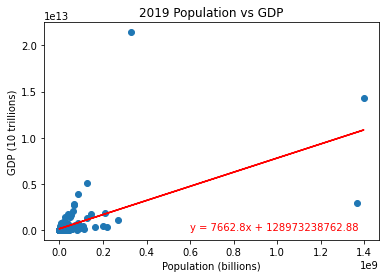

In [44]:
# Remove Taiwan- no data
clean_pop = population_df.loc[population_df["Country Code"] != "TWN"]

# replace empty strings
clean_pop["2019 GDP"].replace("",np.nan)

# plot 2019 gdp vs pop
pop = clean_pop["2019 Population"]
gdp = clean_pop["2019 GDP"]
plt.scatter(pop, gdp)
plt.title("2019 Population vs GDP")
plt.xlabel("Population (billions)")
plt.ylabel("GDP (10 trillions)")

# Perform linear regression on 2019 Pop v GDP
slope, intercept, r, p, std_err = st.linregress(pop,gdp)

# create equation line
fit= slope * pop + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(600000000,10000),fontsize=10,color='red')
plt.plot(pop,fit,"r-")
print(f'r-squared is: {r**2}\np-value is: {p}')

#### incredibly small p-value in the 10^-20 range shows there is an issue with the Data, and the answer arises when reflecting on Nathan's work: the GDP is not normally distributed data and thus doing this sort of statistical analysis would possibly require a much more in-depth job of rebinning data in to more sensible groups, and analyzing according to those groups. It's clear here with the odd p-value that something is amiss, and that true analysis would require further work

# Plot and analysis of 2016 Population v GDP

#### used Access to Electricity for kicks- i had done the work to retrieve it, why not use it?

----------------------------------------
Global mean access to electricity is 82.42%
----------------------------------------

r-squared is: 0.30520291606482935
p-value is: 2.9420223316620802e-18


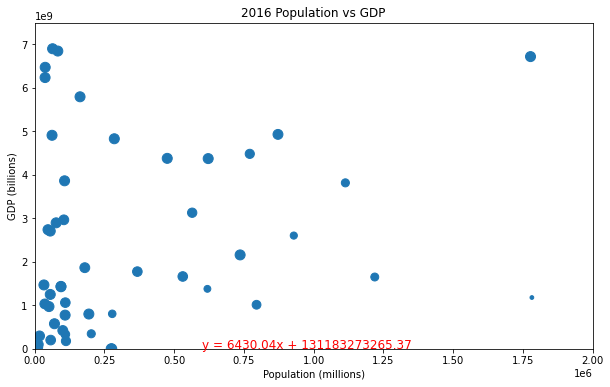

In [45]:
# plot 2016 Population vs 2019 GDP with access to electricity % as weight
pop = clean_pop["2016 Population"]
gdp = clean_pop["2016 GDP"]
elec_access = clean_pop["Access to Electricity (2016)"]
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = pop, y = gdp, s = elec_access)
plt.title("2016 Population vs GDP")
plt.xlabel("Population (millions)")
plt.ylabel("GDP (billions)")
plt.xlim(-1,2000000)
plt.ylim(-1,7500000000)
print(f'----------------------------------------\nGlobal mean access to electricity is {round(clean_pop["Access to Electricity (2016)"].mean(),2)}%\n----------------------------------------\n')
# Perform linear regression on 2019 Pop v GDP
slope, intercept, r, p, std_err = st.linregress(pop,gdp)

# create equation line
fit= slope * pop + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(600000,10000),fontsize=12,color='red')
plt.plot(pop,fit,"r-")
print(f'r-squared is: {r**2}\np-value is: {p}')

### same goes as above: the odd p value shows something is up. Data probably needs to be reconsidered/reavaluated

### What is the tiny (low electricity access) data point?
    
   #### - found that its Guinea-Bissau, in Sub-Saharan Africa

In [46]:
find_small = clean_pop.loc[clean_pop["2016 Population"] > 1750000]
find_small = find_small.loc[find_small["2016 Population"] < 2000000]
find_small

,Country,Income Lvl,Country Code,Lat,Lng,Region,2015 GDP,2016 GDP,2017 GDP,2018 GDP,2019 GDP,2015 bins,2019 Population,2016 Population,Access to Electricity (2016)
109,Guinea-Bissau,Low income,GNB,11.8037,-15.1804,Sub-Saharan Africa,1.048230e+09,1.179005e+09,1.350177e+09,1.458868e+09,1.339449e+09,Lowest Low,1920922,1782437,14
168,Latvia,High income,LVA,56.9465,24.1048,Europe & Central Asia,2.723965e+10,2.805233e+10,3.045876e+10,3.441601e+10,3.410291e+10,Upper Middle,1913822,1959537,100
291,Kosovo,Upper middle income,XKX,42.565,20.926,Europe & Central Asia,6.442916e+09,6.719172e+09,7.245707e+09,7.942962e+09,7.926134e+09,Middle,1788878,1777557,100


# Formatting and printing the final data

In [49]:
# format electricy column to be percent
population_df["Access to Electricity (2016)"] = population_df["Access to Electricity (2016)"].map("{:}%".format)

# turn populations list into populations(millions) by dividing by a 1,000,000
gdp_2015 = [round(pop / 1000000,3) for pop in population_df["2015 GDP"]]
population_df["2015 GDP"] = gdp_2015

gdp_2016 = [round(pop / 1000000,3) for pop in population_df["2016 GDP"]]
population_df["2016 GDP"] = gdp_2016

gdp_2017= [round(pop / 1000000,3) for pop in population_df["2017 GDP"]]
population_df["2017 GDP"] = gdp_2017

gdp_2018= [round(pop / 1000000,3) for pop in population_df["2018 GDP"]]
population_df["2018 GDP"] = gdp_2018

gdp_2019 = [round(pop / 1000000,3) for pop in population_df["2019 GDP"]]
population_df["2019 GDP"] = gdp_2019

# rename columns to fit adjustments
population_df = population_df.rename(columns={
    "2015 GDP" : "2015 GDP (millions)",
    "2016 GDP" : "2016 GDP (millions)",
    "2017 GDP" : "2017 GDP (millions)",
    "2018 GDP" : "2018 GDP (millions)",
    "2019 GDP" : "2019 GDP (millions)",
    "2015 bins" : "2015 Bins"
})

population_df

,Country,Income Lvl,Country Code,Lat,Lng,Region,2015 GDP (millions),2016 GDP (millions),2017 GDP (millions),2018 GDP (millions),2019 GDP (millions),2015 Bins,2019 Population,2016 Population,Access to Electricity (2016)
0,Aruba,High income,ABW,12.5167,-70.0167,Latin America & Caribbean,2919.553,2965.922,3056.425,0.000,0.000,Lowest Low,106314,104872,95%
1,Afghanistan,Low income,AFG,34.5228,69.1761,South Asia,19907.111,18017.749,18869.946,18353.881,19291.104,Middle,38041754,35383128,84%
3,Angola,Lower middle income,AGO,-8.81155,13.242,Sub-Saharan Africa,116193.649,101123.851,122123.822,101353.231,88815.698,Upper Middle,31825295,28842484,40%
4,Albania,Upper middle income,ALB,41.3317,19.8172,Europe & Central Asia,11386.846,11861.201,13019.693,15147.021,15279.183,Middle,2854191,2876101,100%
5,Andorra,High income,AND,42.5075,1.5218,Europe & Central Asia,2789.870,2896.679,3000.181,3218.316,3154.058,Lowest Low,77142,77297,100%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,Kosovo,Upper middle income,XKX,42.565,20.926,Europe & Central Asia,6442.916,6719.172,7245.707,7942.962,7926.134,Middle,1788878,1777557,100%
293,"Yemen, Rep.",Low income,YEM,15.352,44.2075,Middle East & North Africa,42450.621,30935.979,26736.140,23486.270,22581.082,Upper Middle,29161922,27168210,71%
294,South Africa,Upper middle income,ZAF,-25.746,28.1871,Sub-Saharan Africa,317620.523,296357.283,349554.117,368288.940,351431.649,High,58558267,56207649,84%
295,Zambia,Lower middle income,ZMB,-15.3982,28.2937,Sub-Saharan Africa,21243.339,20954.754,25868.165,26312.141,23309.774,Upper Middle,17861030,16363507,27%


### Send Final DataFrame to csv

In [48]:
population_df.to_csv("population_df.csv")